# Import

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, RobustScaler, LabelEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score)
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.impute import SimpleImputer

# Load and clean dataset

In [33]:
src1='/content/drive/MyDrive/analytics/churn-bigml-80.csv'
src2='/content/drive/MyDrive/analytics/churn-bigml-20.csv'
df = pd.read_csv(src1)
test = pd.read_csv(src2)

In [34]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None

In [35]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [36]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [38]:
pd.concat([df, test]).isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [39]:
pd.concat([df, test]).duplicated().sum()

0

In [40]:
df.drop(columns = ['Area code']).describe()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# EDA

In [41]:
intl_plan_churn = df.groupby('International plan')['Churn'].mean() * 100
print(intl_plan_churn)

International plan
No     11.268781
Yes    43.703704
Name: Churn, dtype: float64


In [42]:
vmail_plan_churn = df.groupby('Voice mail plan')['Churn'].mean() * 100
print(vmail_plan_churn)

Voice mail plan
No     16.709778
Yes     8.867667
Name: Churn, dtype: float64


# Feature engineering

In [43]:
df["Total charge"] = df["Total day charge"] + df["Total eve charge"] + df["Total night charge"]
df["Customer service calls rate"] = df["Customer service calls"] / df["Account length"]

In [44]:
test["Total charge"] = test["Total day charge"] + test["Total eve charge"] + test["Total night charge"]
test["Customer service calls rate"] = test["Customer service calls"] / test["Account length"]

In [45]:
df.drop(columns=['Account length', 'Area code']).corr(numeric_only=True)

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Customer service calls rate
Number vmail messages,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474,0.021430,-0.010690
Total day minutes,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688,0.885168,-0.012566
Total day calls,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290,0.005980,-0.006753
Total day charge,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689,0.885173,-0.012562
Total eve minutes,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906,0.414413,-0.015205
Total eve calls,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539,0.004783,-0.012703
Total eve charge,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196,0.072893,0.414405,-0.015194
Total night minutes,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236,0.033639,0.224673,-0.007813
Total night calls,0.008124,0.015054,-0.016776,0.015057,0.009017,0.000797,0.009030,0.012736,1.000000,0.012720,-0.023447,0.019367,-0.023434,-0.005677,0.012262,0.019773,-0.018659
Total night charge,-0.000229,0.013464,0.008972,0.013468,-0.013450,-0.000135,-0.013464,0.999999,0.012720,1.000000,-0.008615,-0.001099,-0.008517,0.005257,0.033635,0.224634,-0.007821


# Data visualization

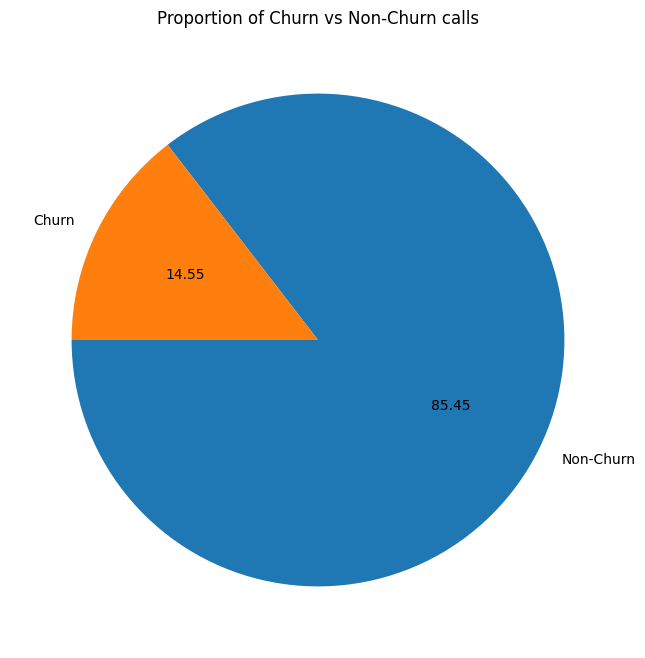

In [46]:
churn_val = df['Churn'].value_counts()
churn_labels = ['Non-Churn', 'Churn']
churn_sizes = churn_val.values

plt.figure(figsize=(8, 8))
plt.pie(churn_sizes, labels=churn_labels, autopct=f'%.2f', startangle=180)
plt.title('Proportion of Churn vs Non-Churn calls')
plt.show()

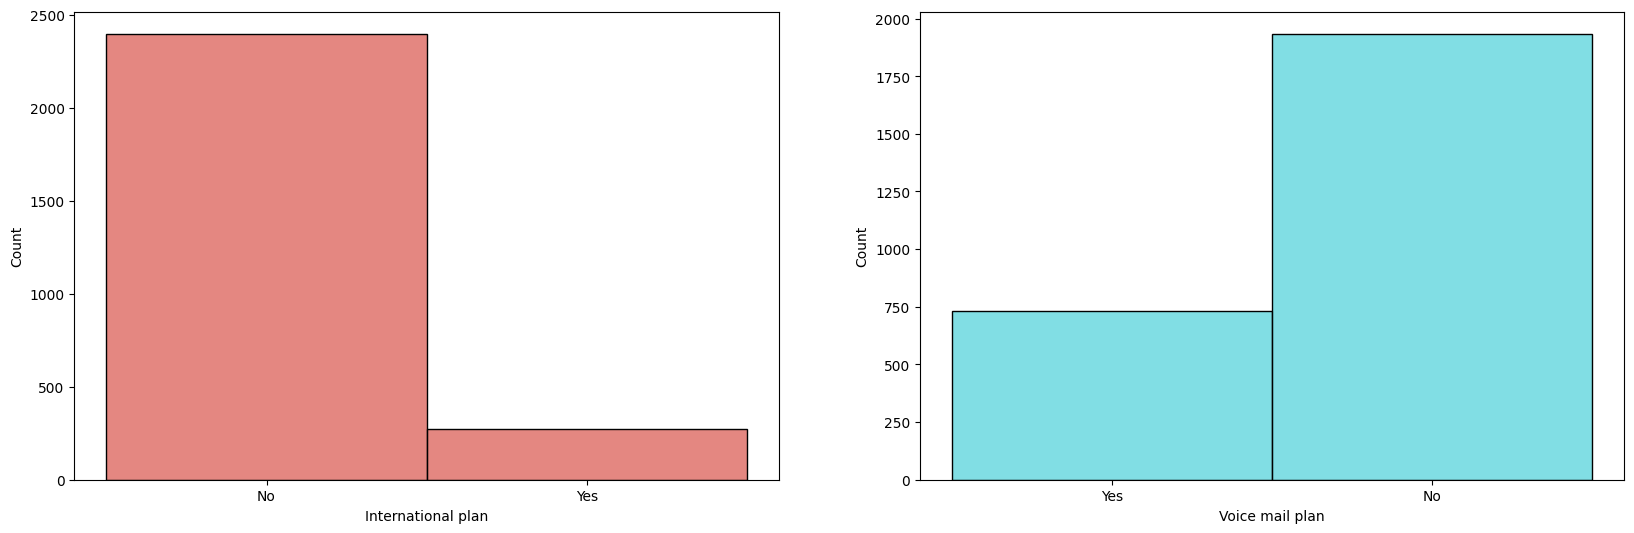

<Figure size 640x480 with 0 Axes>

In [47]:
df_ = df.copy()
vcols = ['International plan', 'Voice mail plan']

# Create a subplot grid
fig, axes = plt.subplots(1, len(vcols), figsize=(20, 6))
palette = sns.color_palette("hls", len(vcols))
for col, ax, color in zip(vcols, axes.flat, palette):
  sns.histplot(ax=ax, data=df, x=col, color=color)

plt.subplots_adjust(bottom=0.1)  # Adjust spacing between subplots
plt.show()
plt.clf()

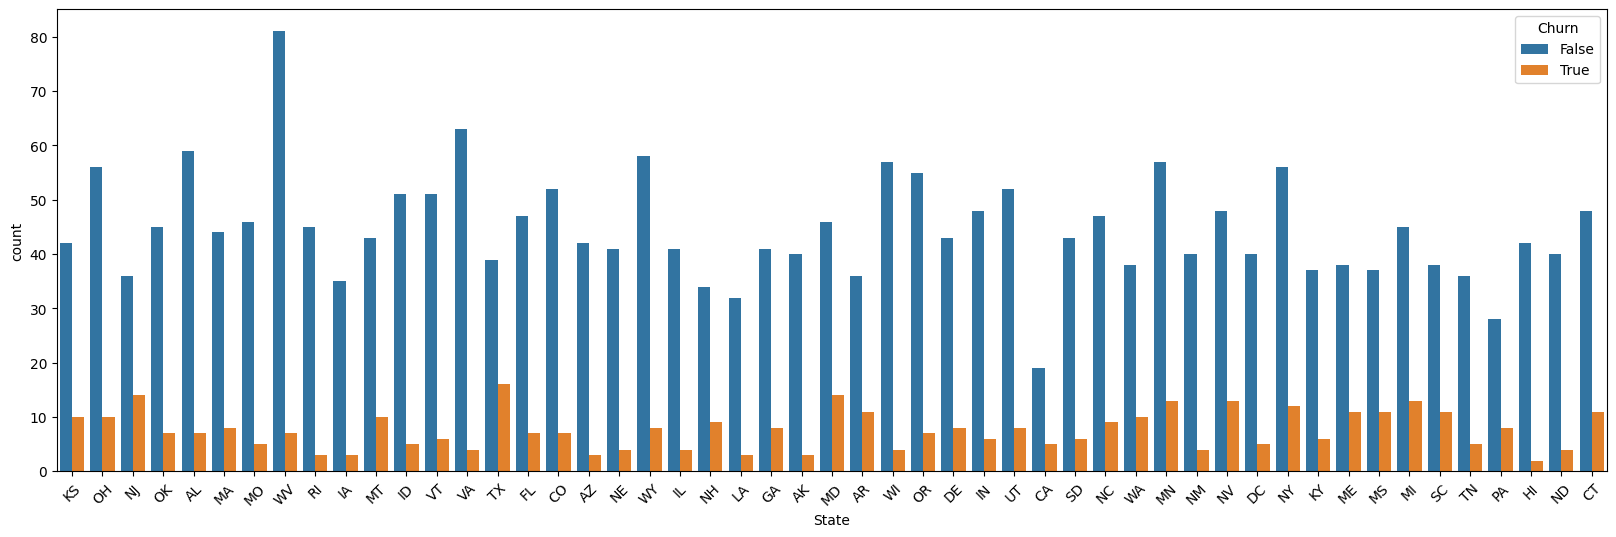

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='State', hue='Churn')
plt.xticks(rotation=45)
plt.show()
plt.clf()

<Figure size 2000x600 with 0 Axes>

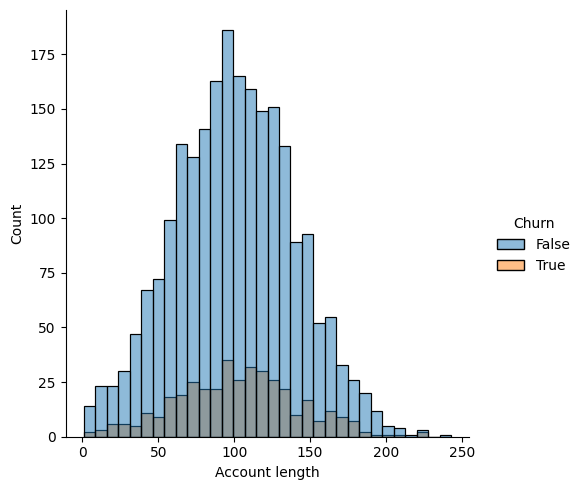

<Figure size 640x480 with 0 Axes>

In [49]:
plt.figure(figsize=(20, 6))
sns.displot(data=df, x='Account length', hue='Churn')
plt.show()
plt.clf()

<ipython-input-50-3e65fc9fd080>:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#db5f57'` for the same effect.

  sns.countplot(ax=ax, x=col, hue="Churn", data=df, stat='percent', color=color)
<ipython-input-50-3e65fc9fd080>:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#57d3db'` for the same effect.

  sns.countplot(ax=ax, x=col, hue="Churn", data=df, stat='percent', color=color)


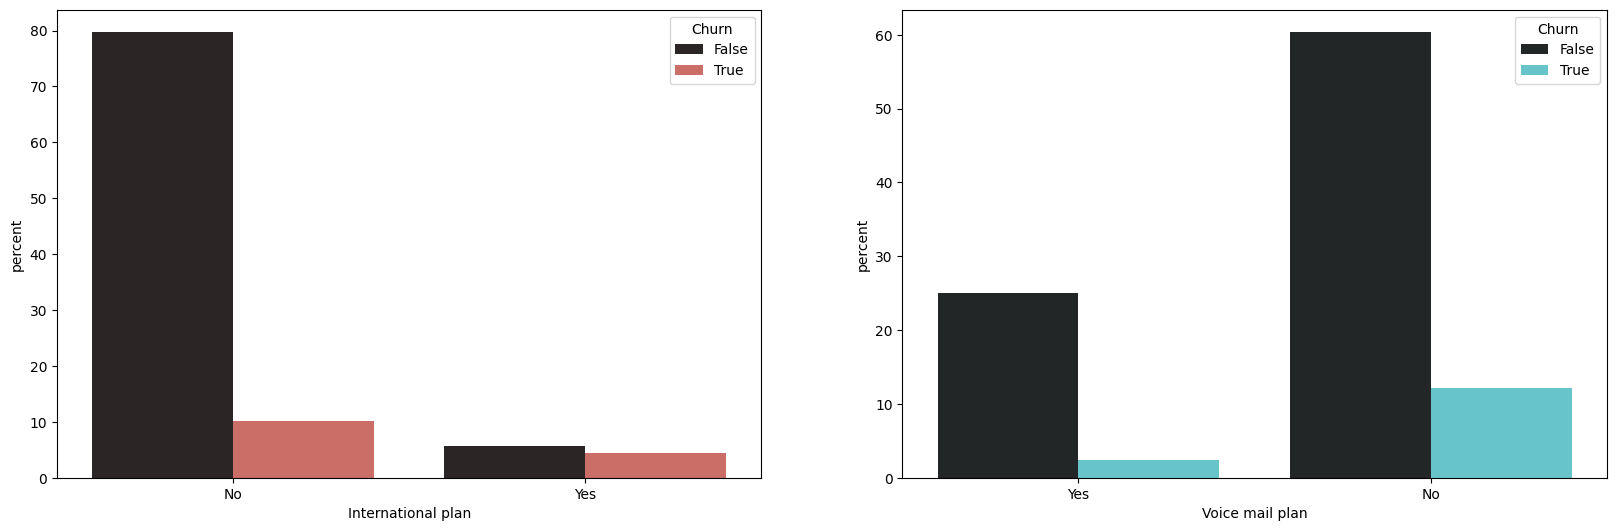

<Figure size 640x480 with 0 Axes>

In [50]:
df_ = df.copy()
vcols = ['International plan', 'Voice mail plan']

# Create a subplot grid
fig, axes = plt.subplots(1, len(vcols), figsize=(20, 6))
palette = sns.color_palette("hls", len(vcols))
for col, ax, color in zip(vcols, axes.flat, palette):
  sns.countplot(ax=ax, x=col, hue="Churn", data=df, stat='percent', color=color)

plt.subplots_adjust(bottom=0.1)  # Adjust spacing between subplots
plt.show()
plt.clf()

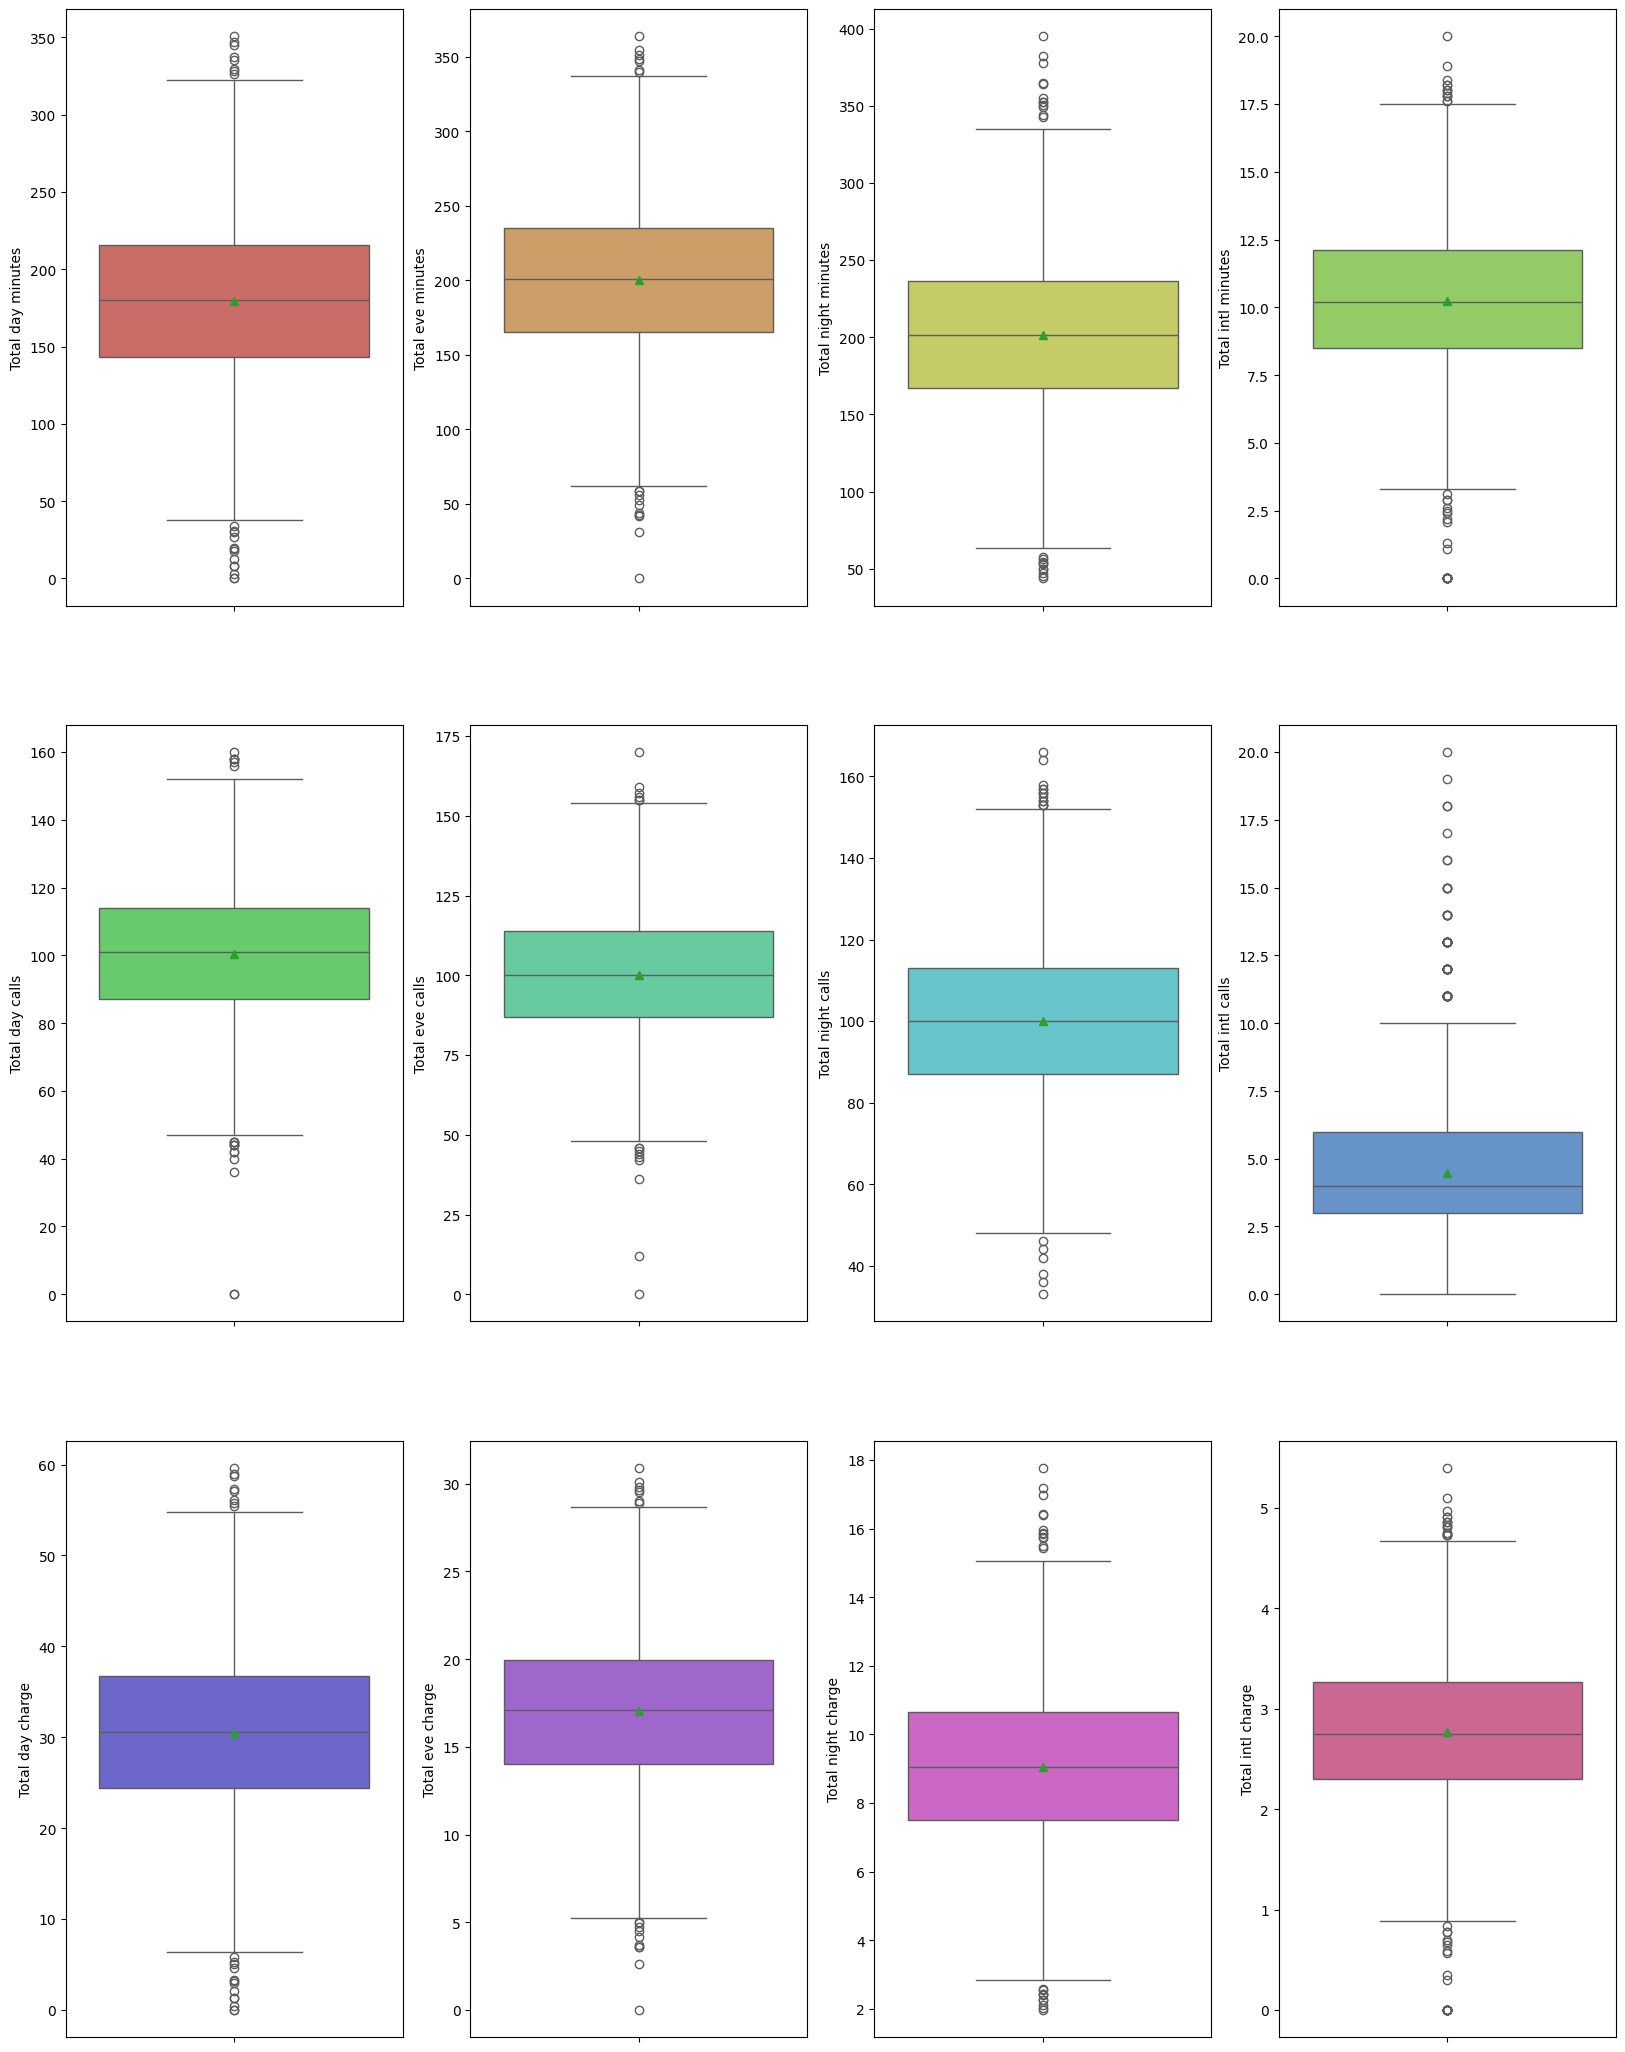

<Figure size 640x480 with 0 Axes>

In [51]:
vcols = ['Total day minutes', 'Total eve minutes','Total night minutes', 'Total intl minutes',
         'Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls',
           'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']

# Create a subplot grid
fig, axes = plt.subplots(3, int(len(vcols)/3), figsize=(20, 26))

palette = sns.color_palette("hls", len(vcols))
# Loop through each column and create a boxplot on a separate axis
for col, ax, color in zip(vcols, axes.flat, palette):
    sns.boxplot(ax=ax, y=col, showmeans=True, data=df_, color=color)  # Replace "categorical_column" with your actual category column

# Customize the plot (optional)
plt.subplots_adjust(bottom=0.1)  # Adjust spacing between subplots
plt.show()
plt.clf()

<Axes: ylabel='Total charge'>

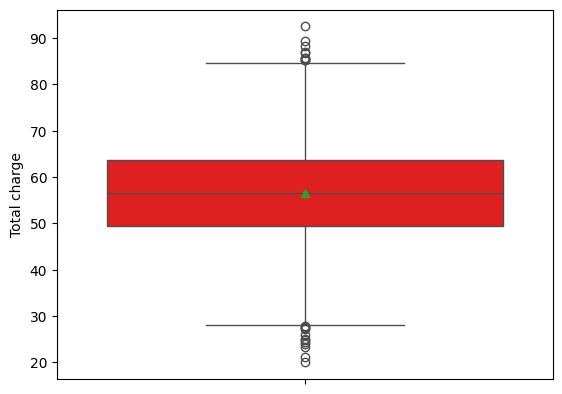

In [52]:
sns.boxplot(y='Total charge', showmeans=True, data=df_, color='red')

<Axes: >

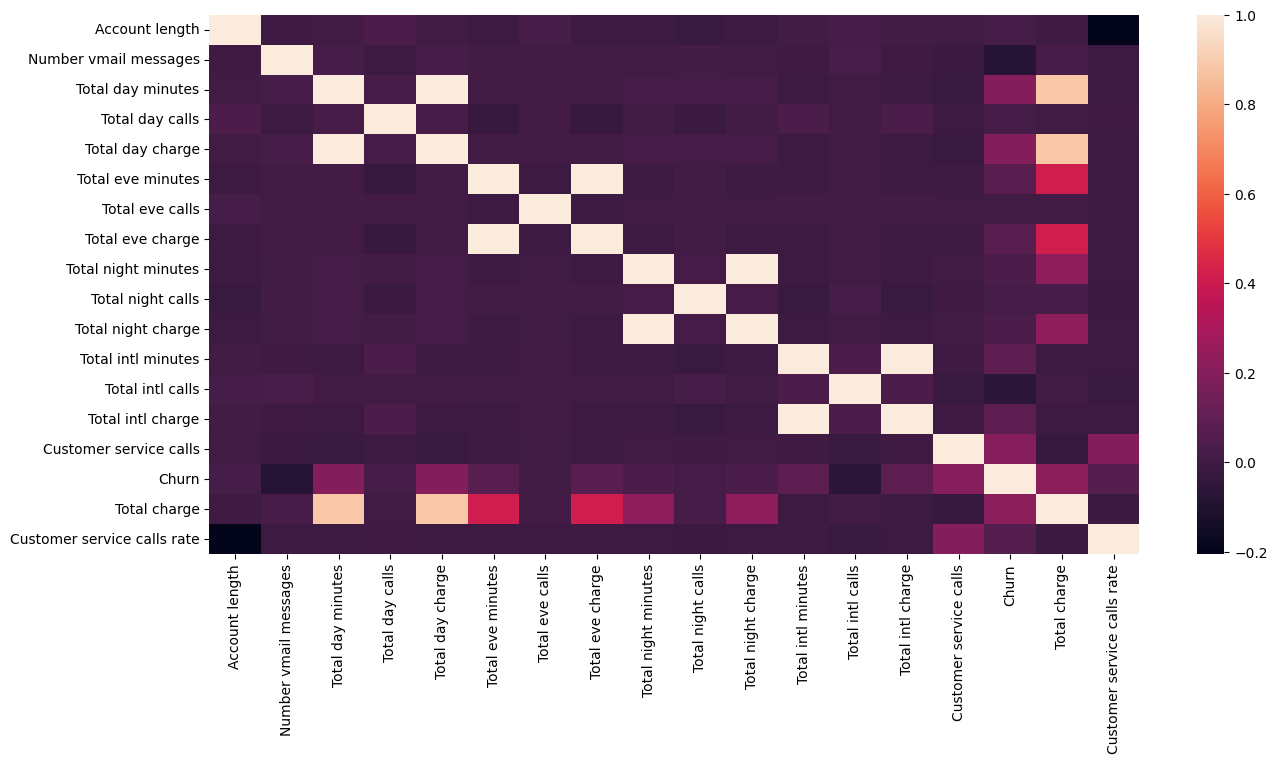

In [53]:
plt.figure(figsize = (15,7))
sns.heatmap(df.drop(columns=['Area code']).corr(numeric_only=True))

# Data preprocess

In [54]:
# df.drop(columns = [''])

# Model development

In [55]:
df_= df.copy()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        2666 non-null   object 
 1   Account length               2666 non-null   int64  
 2   Area code                    2666 non-null   int64  
 3   International plan           2666 non-null   object 
 4   Voice mail plan              2666 non-null   object 
 5   Number vmail messages        2666 non-null   int64  
 6   Total day minutes            2666 non-null   float64
 7   Total day calls              2666 non-null   int64  
 8   Total day charge             2666 non-null   float64
 9   Total eve minutes            2666 non-null   float64
 10  Total eve calls              2666 non-null   int64  
 11  Total eve charge             2666 non-null   float64
 12  Total night minutes          2666 non-null   float64
 13  Total night calls 

In [57]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Total charge', 'Customer service calls rate'],
      dtype='object')

In [68]:
# Chọn các biến đầu vào và đầu ra
features = ['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Total charge', 'Customer service calls']
target = ['Churn']


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = df_[features]
y_train = df_[target].to_numpy().ravel()
X_test = test[features]
y_test = test[target].to_numpy().ravel()

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

## Feature Selection

In [59]:
# Xây dựng pipeline
numeric_features = ['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls', 'Account length', 'Total charge']
categorical_features = ['State', 'Area code', 'International plan', 'Voice mail plan']

le = LabelEncoder()
le.fit(df_['Area code'])
y_train = le.transform(df_['Area code'])
y_test = le.transform(test['Area code'])

le = LabelEncoder()
le.fit(df_['State'])
y_train = le.transform(df_['State'])
y_test = le.transform(test['State'])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features)
    ])

In [60]:
xgb = XGBClassifier(colsample_bytree=0.7, learning_rate=0.2, max_depth=6, n_estimators=200,subsample=1.0)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb)
])

In [61]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls',
                                                   'Acco...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [62]:
final_estimator = pipeline.named_steps['xgb']

# Get the feature importances
importances = final_estimator.feature_importances_

# Combine feature names with their importances
feature_importances = pd.DataFrame({'Feature': numeric_features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                   Feature  Importance
0    Number vmail messages    0.070564
3         Total day charge    0.065077
13  Customer service calls    0.064313
7      Total night minutes    0.064006
11        Total intl calls    0.063559
5          Total eve calls    0.062430
14          Account length    0.062212
10      Total intl minutes    0.061865
8        Total night calls    0.061746
4        Total eve minutes    0.061739
12       Total intl charge    0.061460
1        Total day minutes    0.061083
6         Total eve charge    0.060983
2          Total day calls    0.060781
15            Total charge    0.059866
9       Total night charge    0.058316


## Prepare for model below

In [70]:
# Xây dựng pipeline
numeric_features = ['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls', 'Account length', 'Total charge']
categorical_features = ['State', 'Area code', 'International plan', 'Voice mail plan']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

## XGBOOST

In [71]:
xgb = XGBClassifier()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb)
])

In [72]:
param_grid_xgb = {
    'xgb__learning_rate': [0.05, 0.1, 0.2],
    'xgb__n_estimators': [100, 200, 500],
    'xgb__max_depth': [3, 5, 6, 8],
    'xgb__subsample': [0.7, 0.8, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0]
}

In [74]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

grid_search=GridSearchCV(estimator=pipeline, param_grid=param_grid_xgb, cv=skf, scoring='f1', verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.7;, score=0.826 total time=   0.1s
[CV 2/5] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.7;, score=0.871 total time=   0.1s
[CV 3/5] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.7;, score=0.915 total time=   0.1s
[CV 4/5] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.7;, score=0.887 total time=   0.1s
[CV 5/5] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.7;, score=0.890 total time=   0.1s
[CV 1/5] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8;, score=0.832 total t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Number '
                                                                          'vmail '
                                                                          'messages',
                                                                          'Total '
                                                                          'day '
                                                                          'minutes',
                                                                          'Total '
                                                                          'day '
                                                                          'calls',
                                                                          'Total '
                                                                          'day '
                                                                          'charge',
                                                                          'Total '
                                                                          'eve '
                                                                          'minutes',
                                                                          'Total '
                                                                          'eve '
                                                                          'calls',
                                                                          'Total '
                                                                          'eve '
                                                                          'charge',
                                                                          'Total '
                                                                          'night '
                                                                          'minutes',
                                                                          'Tot...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__colsample_bytree': [0.7, 0.8, 1.0],
                         'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 6, 8],
                         'xgb__n_estimators': [100, 200, 500],
                         'xgb__subsample': [0.7, 0.8, 1.0]},
             scoring='f1', verbose=3)

In [75]:
grid_search.best_params_

{'xgb__colsample_bytree': 0.7,
 'xgb__learning_rate': 0.2,
 'xgb__max_depth': 8,
 'xgb__n_estimators': 100,
 'xgb__subsample': 1.0}

In [76]:
best_model = grid_search.best_estimator_
print(best_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                             

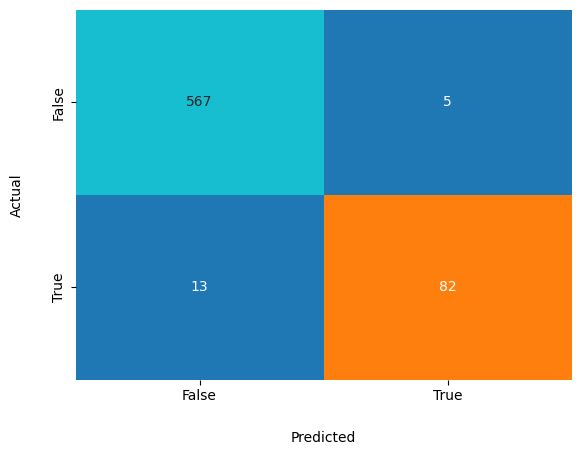

In [77]:
y_pred = best_model.predict(X_test)
y_pred_label = le.inverse_transform(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d',
    cbar=False, cmap='tab10', vmax=500,
    xticklabels=['False', 'True'],
    yticklabels=['False', 'True'])

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [78]:
precision = precision_score(y_test, y_pred, pos_label=True, average='binary')
recall = recall_score(y_test, y_pred, pos_label=True, average='binary')
f1score = f1_score(y_test, y_pred, pos_label=True, average='binary')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.9425287356321839
Recall = 0.8631578947368421
F1 Score = 0.901098901098901


## Random Forest

In [79]:
rf = RandomForestClassifier()

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("rf", rf)
])

In [80]:
param_grid_rf = {
    'rf__n_estimators': [20, 50, 80, 100, 150, 500],
}

In [81]:
grid_search=GridSearchCV(estimator=pipeline, param_grid=param_grid_rf, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Number '
                                                                          'vmail '
                                                                          'messages',
                                                                          'Total '
                                                                          'day '
                                                                          'minutes',
                                                                          'Total '
                                                                          'day '
                                                                          'calls',
                                                                          'Total '
                                                                          'day '
                                                                          'charge',
                                                                          'Total '
                                                                          'eve '
                                                                          'minutes',
                                                                          'Total '
                                                                          'eve '
                                                                          'calls',
                                                                          'Total '
                                                                          'eve '
                                                                          'charge',
                                                                          'Total '
                                                                          'night '
                                                                          'minutes',
                                                                          'Total '
                                                                          'night '
                                                                          'calls',
                                                                          'Total '
                                                                          'night '
                                                                          'charge',
                                                                          'Total '
                                                                          'intl '
                                                                          'minutes',
                                                                          'Total '
                                                                          'intl '
                                                                          'calls',
                                                                          'Total '
                                                                          'intl '
                                                                          'charge',
                                                                          'Customer '
                                                                          'service '
                                                                          'calls',
                                                                          'Account '
                                                                          'length',
                                                                          'Total '
              

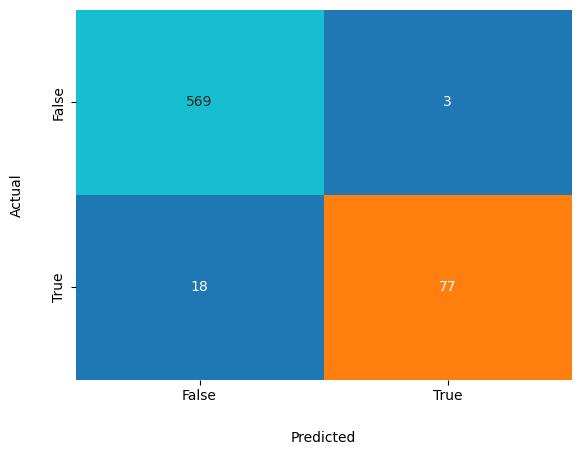

In [82]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_label = le.inverse_transform(y_pred)
conf_matrix = confusion_matrix(test[target], y_pred_label)

ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d',
    cbar=False, cmap='tab10', vmax=500,
    xticklabels=['False', 'True'],
    yticklabels=['False', 'True'])

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [83]:
precision = precision_score(y_test, y_pred, pos_label=True, average='binary')
recall = recall_score(y_test, y_pred, pos_label=True, average='binary')
f1score = f1_score(y_test, y_pred, pos_label=True, average='binary')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.9625
Recall = 0.8105263157894737
F1 Score = 0.88


## Casual Data + RobustScaler

In [84]:
df_= df.copy()

In [85]:
# Chọn các biến đầu vào và đầu ra
features = ['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']
target = ['Churn']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = df_[features]
y_train = df_[target]
X_test = test[features]
y_test = test[target]

# Xây dựng pipeline
numeric_features = ['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls', 'Account length']
categorical_features = ['State', 'Area code', 'International plan', 'Voice mail plan']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Dựng model
xgb = XGBClassifier()

# Xây dựng pipeline với model
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb)
])

In [86]:
param_grid = {
    'xgb__learning_rate': [0.05, 0.1, 0.2],
    'xgb__n_estimators': [100, 200, 500],
    'xgb__max_depth': [3, 5, 8],
    'xgb__subsample': [0.7, 0.8, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0]
}

In [87]:
grid_search=GridSearchCV(estimator=pipeline2, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [88]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls',
                                                   'Acco...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

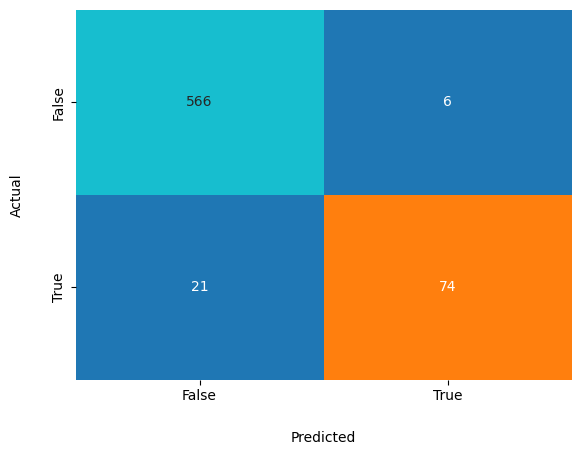

In [89]:
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d',
    cbar=False, cmap='tab10', vmax=500,
    xticklabels=['False', 'True'],
    yticklabels=['False', 'True'])

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [90]:
precision = precision_score(y_test, y_pred, pos_label=True, average='binary')
recall = recall_score(y_test, y_pred, pos_label=True, average='binary')
f1score = f1_score(y_test, y_pred, pos_label=True, average='binary')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.925
Recall = 0.7789473684210526
F1 Score = 0.8457142857142858


## Undersampling

In [91]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['Churn'])
y = df[['Churn']]
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [92]:
df_u = pd.concat([X_resampled, y_resampled], axis=1)

In [93]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        776 non-null    object 
 1   Account length               776 non-null    int64  
 2   Area code                    776 non-null    int64  
 3   International plan           776 non-null    object 
 4   Voice mail plan              776 non-null    object 
 5   Number vmail messages        776 non-null    int64  
 6   Total day minutes            776 non-null    float64
 7   Total day calls              776 non-null    int64  
 8   Total day charge             776 non-null    float64
 9   Total eve minutes            776 non-null    float64
 10  Total eve calls              776 non-null    int64  
 11  Total eve charge             776 non-null    float64
 12  Total night minutes          776 non-null    float64
 13  Total night calls   

<Axes: >

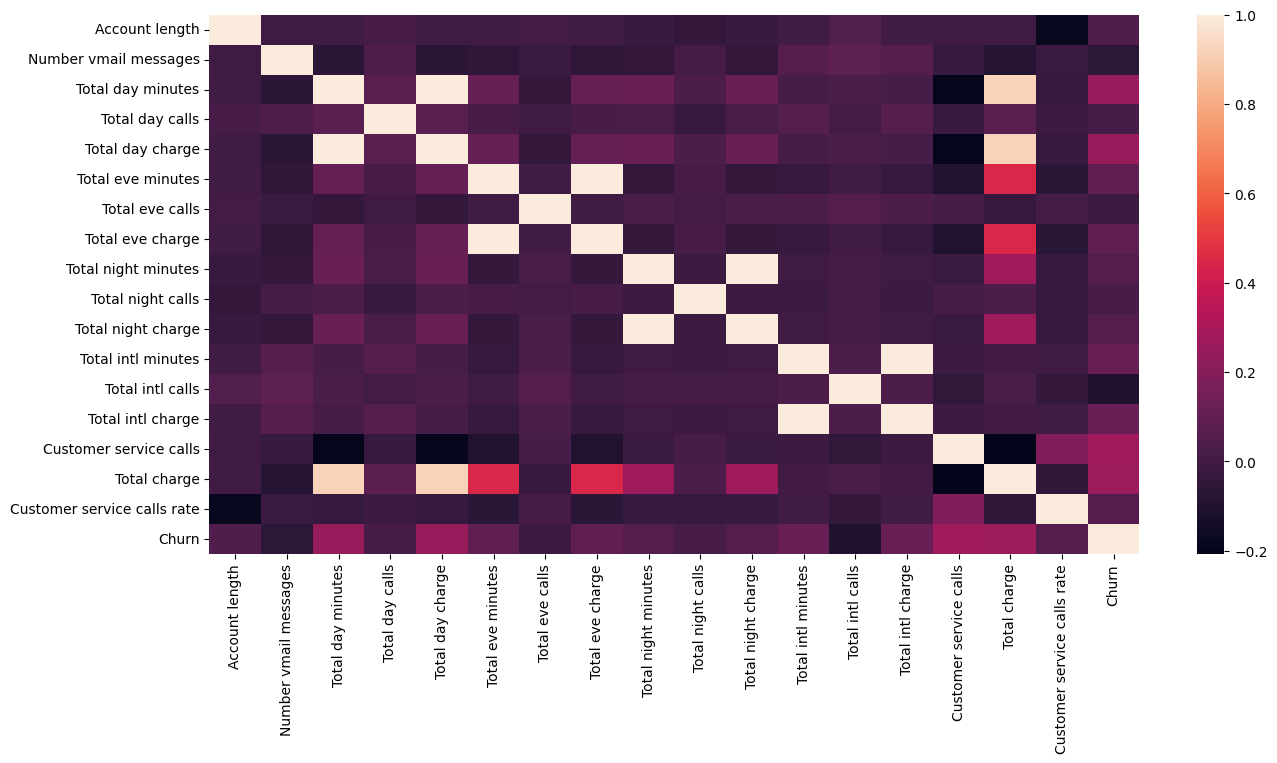

In [94]:
plt.figure(figsize = (15,7))
sns.heatmap(df_u.drop(columns=['Area code']).corr(numeric_only=True))

In [95]:
# Chọn các biến đầu vào và đầu ra
features = ['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']
target = ['Churn']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = df_u[features]
y_train = df_u[target]
X_test = test[features]
y_test = test[target]

# Xây dựng pipeline
numeric_features = ['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls', 'Account length']
categorical_features = ['State', 'Area code', 'International plan', 'Voice mail plan']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Dựng model
xgb = XGBClassifier()

# Xây dựng pipeline với model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classification', xgb)
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls',
                                                   'Acco...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

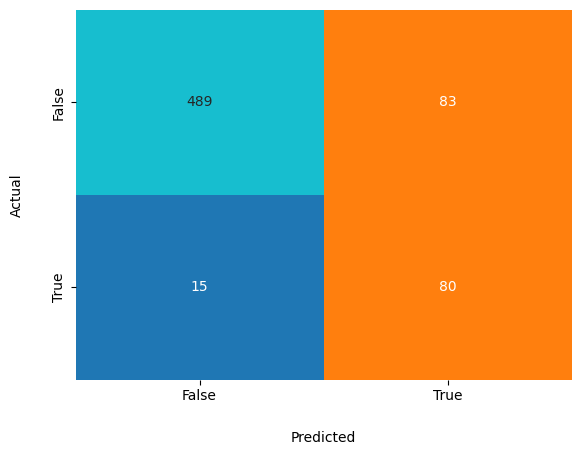

In [96]:
y_pred = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d',
    cbar=False, cmap='tab10', vmax=500,
    xticklabels=['False', 'True'],
    yticklabels=['False', 'True'])

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [97]:
precision = precision_score(y_test, y_pred, pos_label=True, average='binary')
recall = recall_score(y_test, y_pred, pos_label=True, average='binary')
f1score = f1_score(y_test, y_pred, pos_label=True, average='binary')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.49079754601226994
Recall = 0.8421052631578947
F1 Score = 0.6201550387596899


## Oversampling


In [98]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Total charge', 'Customer service calls rate'],
      dtype='object')

In [99]:
from imblearn.over_sampling import SMOTENC

X = df.drop(columns=['Churn'])
y = df[['Churn']]
smc = SMOTENC(random_state=42, categorical_features=[0, 2, 3, 4])
X_resampled, y_resampled = smc.fit_resample(X, y)

In [100]:
df_o = pd.concat([X_resampled, y_resampled], axis=1)

In [101]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4556 entries, 0 to 4555
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        4556 non-null   object 
 1   Account length               4556 non-null   int64  
 2   Area code                    4556 non-null   int64  
 3   International plan           4556 non-null   object 
 4   Voice mail plan              4556 non-null   object 
 5   Number vmail messages        4556 non-null   int64  
 6   Total day minutes            4556 non-null   float64
 7   Total day calls              4556 non-null   int64  
 8   Total day charge             4556 non-null   float64
 9   Total eve minutes            4556 non-null   float64
 10  Total eve calls              4556 non-null   int64  
 11  Total eve charge             4556 non-null   float64
 12  Total night minutes          4556 non-null   float64
 13  Total night calls 

<Axes: >

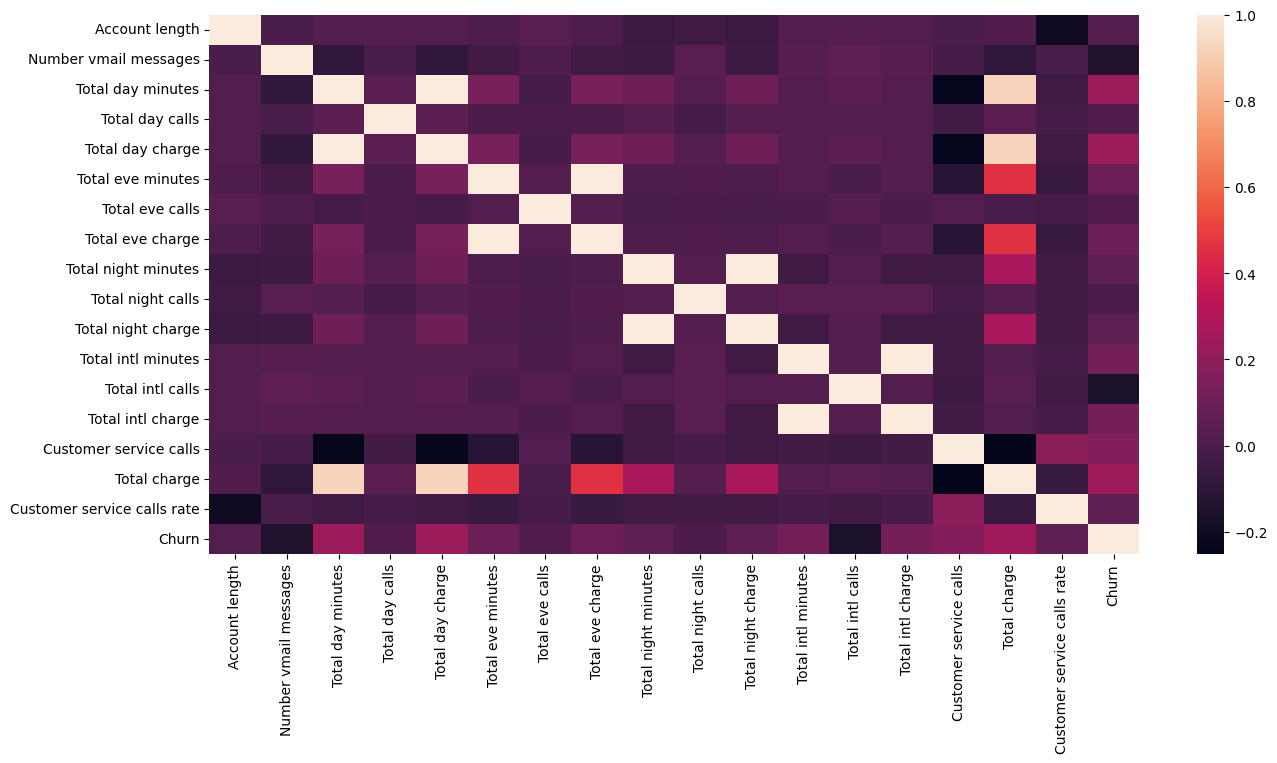

In [102]:
plt.figure(figsize = (15,7))
sns.heatmap(df_o.drop(columns=['Area code']).corr(numeric_only=True))

In [103]:
# Chọn các biến đầu vào và đầu ra
features = ['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']
target = ['Churn']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = df_o[features]
y_train = df_o[target]
X_test = test[features]
y_test = test[target]

# Xây dựng pipeline
numeric_features = ['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls', 'Account length']
categorical_features = ['State', 'Area code', 'International plan', 'Voice mail plan']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Dựng model
xgb = XGBClassifier()

# Xây dựng pipeline với model
pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb)
])

# Huấn luyện mô hình
# pipeline.fit(X_train, y_train)

In [104]:
grid_search=GridSearchCV(estimator=pipeline3, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [105]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls',
                                                   'Acco...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

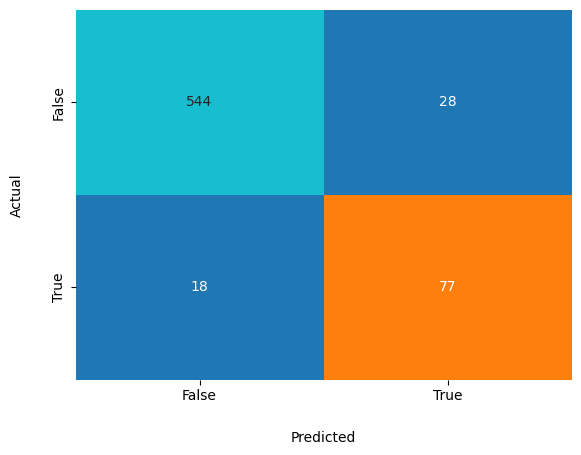

In [106]:
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d',
    cbar=False, cmap='tab10', vmax=500,
    xticklabels=['False', 'True'],
    yticklabels=['False', 'True'])

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [107]:
precision = precision_score(y_test, y_pred, pos_label=True, average='binary')
recall = recall_score(y_test, y_pred, pos_label=True, average='binary')
f1score = f1_score(y_test, y_pred, pos_label=True, average='binary')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.7333333333333333
Recall = 0.8105263157894737
F1 Score = 0.77
